In [ ]:
# Get access of your google drive
from google.colab import drive
drive.mount('./gdrive')

Mounted at ./gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Imarticus_Stats

/content/gdrive/MyDrive/Imarticus_Stats


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
!unzip 'bitstampUSD.zip'

In [ ]:
bit_data=pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv")

Added a column which is "date" and converted "Timestamp" columns to date form

In [ ]:
bit_data["date"] = pd.to_datetime(bit_data["Timestamp"],unit='s').dt.date
group= bit_data.groupby('date')
data = group['Close'].mean()

In [ ]:
data.head()

date
2011-12-31    4.482500
2012-01-01    4.806667
2012-01-02    5.000000
2012-01-03    5.252500
2012-01-04    5.223333
Name: Close, dtype: float64

In [ ]:
data.shape

(2627,)

In [ ]:
data.isnull().sum()

0

Preparing Train and Test

In [ ]:
close_train=data.iloc[:len(data)-50]
close_test=data.iloc[len(close_train):]

Scaling the data

In [ ]:
#feature scaling(set values between 0-1)
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close_scaled=scaler.fit_transform(close_train)

Lets choosw each 50 data as x-train and 51th as y-train

In [ ]:
timestep = 50
x_train = []
y_train = []

for i in range(timestep, close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i, 0])
    y_train.append(close_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)  # reshaped for RNN

print("x_train shape =", x_train.shape)
print("y_train shape =",y_train.shape)

x_train shape = (2527, 50, 1)
y_train shape = (2527,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout, Flatten

# Initialize the Sequential model
regressor = Sequential()

# First RNN layer
regressor.add(SimpleRNN(128, activation="relu", return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.25))

# Second RNN layer
regressor.add(SimpleRNN(256, activation="relu", return_sequences=True))
regressor.add(Dropout(0.25))

# Third RNN layer
regressor.add(SimpleRNN(512, activation="relu", return_sequences=True))
regressor.add(Dropout(0.35))

# Fourth RNN layer
regressor.add(SimpleRNN(256, activation="relu", return_sequences=True))
regressor.add(Dropout(0.25))

# Fifth RNN layer
regressor.add(SimpleRNN(128, activation="relu", return_sequences=True))
regressor.add(Dropout(0.25))

# Convert the matrix to 1-line
regressor.add(Flatten())

# Output layer
regressor.add(Dense(1))

# Compile the model
regressor.compile(optimizer="adam", loss="mean_squared_error")

# Fit the model to the training data
regressor.fit(x_train, y_train, epochs=30, batch_size=64)


Epoch 1/30
40/40 [==============================] - 37s 553ms/step - loss: 0.0075
Epoch 2/30
40/40 [==============================] - 24s 599ms/step - loss: 0.0028
Epoch 3/30
40/40 [==============================] - 22s 552ms/step - loss: 0.0014
Epoch 4/30
40/40 [==============================] - 24s 595ms/step - loss: 0.0015
Epoch 5/30
40/40 [==============================] - 25s 628ms/step - loss: 0.0013
Epoch 6/30
40/40 [==============================] - 22s 547ms/step - loss: 9.7796e-04
Epoch 7/30
40/40 [==============================] - 24s 597ms/step - loss: 7.7627e-04
Epoch 8/30
40/40 [==============================] - 23s 575ms/step - loss: 0.0015
Epoch 9/30
40/40 [==============================] - 23s 564ms/step - loss: 8.7085e-04
Epoch 10/30
40/40 [==============================] - 24s 595ms/step - loss: 8.0795e-04
Epoch 11/30
40/40 [==============================] - 22s 547ms/step - loss: 6.7941e-04
Epoch 12/30
40/40 [==============================] - 24s 594ms/step - loss: 

Preparing our test set for prediction

In [ ]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [ ]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
  x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
predicted_data=regressorpredicted_data=regressor.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

2/2 [==============================] - 2s 119ms/step


In [ ]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

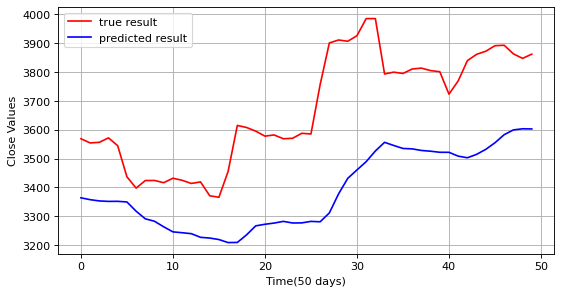

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test, color="r", label="true result")
plt.plot(predicted_data, color="b", label="predicted result")
plt.legend()
plt.xlabel("Time(50 days)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

LSTM

In [ ]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten

model=Sequential()
model.add(LSTM (10, input_shape=(None, 1), activation="relu"))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
79/79 [==============================] - 3s 21ms/step - loss: 0.0251
Epoch 2/30
79/79 [==============================] - 2s 25ms/step - loss: 0.0072
Epoch 3/30
79/79 [==============================] - 2s 24ms/step - loss: 0.0010
Epoch 4/30
79/79 [==============================] - 1s 16ms/step - loss: 3.5192e-04
Epoch 5/30
79/79 [==============================] - 1s 16ms/step - loss: 2.9992e-04
Epoch 6/30
79/79 [==============================] - 1s 19ms/step - loss: 2.7523e-04
Epoch 7/30
79/79 [==============================] - 1s 18ms/step - loss: 2.6376e-04
Epoch 8/30
79/79 [==============================] - 1s 16ms/step - loss: 2.5483e-04
Epoch 9/30
79/79 [==============================] - 1s 16ms/step - loss: 2.4271e-04
Epoch 10/30
79/79 [==============================] - 1s 16ms/step - loss: 2.3257e-04
Epoch 11/30
79/79 [==============================] - 2s 25ms/step - loss: 2.3073e-04
Epoch 12/30
79/79 [==============================] - 2s 29ms/step - loss: 2.2145e-04
E

In [ ]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [ ]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
  x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test.reshape(x_test.shape[0],x_test.shape[1],1)


array([[[0.20329532],
        [0.19796062],
        [0.19233292],
        ...,
        [0.18744551],
        [0.18407395],
        [0.18491251]],

       [[0.19796062],
        [0.19233292],
        [0.17490842],
        ...,
        [0.18407395],
        [0.18491251],
        [0.18579354]],

       [[0.19233292],
        [0.17490842],
        [0.17622168],
        ...,
        [0.18491251],
        [0.18579354],
        [0.18503633]],

       ...,

       [[0.18744551],
        [0.18407395],
        [0.18491251],
        ...,
        [0.20158925],
        [0.20259503],
        [0.20266807]],

       [[0.18407395],
        [0.18491251],
        [0.18579354],
        ...,
        [0.20259503],
        [0.20266807],
        [0.20111549]],

       [[0.18491251],
        [0.18579354],
        [0.18503633],
        ...,
        [0.20266807],
        [0.20111549],
        [0.20030227]]])

In [ ]:
predicted_data=regressor.predict(x_train)
predicted_data=scaler.inverse_transform(predicted_data)

79/79 [==============================] - 11s 136ms/step


In [ ]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

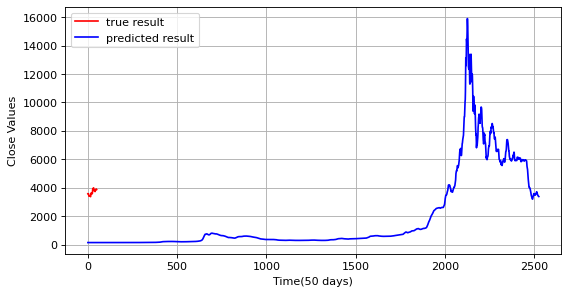

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r", label="true result")
plt.plot(predicted_data,color="b", label="predicted result")
plt.legend()
plt.xlabel("Time(50 days)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

LSTM

In [ ]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten

model=Sequential()
model.add(LSTM (10, input_shape=(None, 1), activation="relu"))
model.add(Dense (1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(x_train,y_train, epochs=30, batch_size=32)

Epoch 1/30
79/79 [==============================] - 5s 30ms/step - loss: 0.0234
Epoch 2/30
79/79 [==============================] - 3s 40ms/step - loss: 0.0023
Epoch 3/30
79/79 [==============================] - 3s 40ms/step - loss: 8.7807e-04
Epoch 4/30
79/79 [==============================] - 2s 31ms/step - loss: 7.2163e-04
Epoch 5/30
79/79 [==============================] - 2s 30ms/step - loss: 5.7541e-04
Epoch 6/30
79/79 [==============================] - 3s 32ms/step - loss: 4.9425e-04
Epoch 7/30
79/79 [==============================] - 3s 32ms/step - loss: 4.5181e-04
Epoch 8/30
79/79 [==============================] - 4s 56ms/step - loss: 4.1169e-04
Epoch 9/30
79/79 [==============================] - 2s 29ms/step - loss: 3.8064e-04
Epoch 10/30
79/79 [==============================] - 1s 18ms/step - loss: 3.6589e-04
Epoch 11/30
79/79 [==============================] - 1s 16ms/step - loss: 3.3089e-04
Epoch 12/30
79/79 [==============================] - 1s 15ms/step - loss: 3.6854e-

In [ ]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [ ]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
  x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test.reshape(x_test.shape[0],x_test.shape[1],1)


array([[[0.20329532],
        [0.19796062],
        [0.19233292],
        ...,
        [0.18744551],
        [0.18407395],
        [0.18491251]],

       [[0.19796062],
        [0.19233292],
        [0.17490842],
        ...,
        [0.18407395],
        [0.18491251],
        [0.18579354]],

       [[0.19233292],
        [0.17490842],
        [0.17622168],
        ...,
        [0.18491251],
        [0.18579354],
        [0.18503633]],

       ...,

       [[0.18744551],
        [0.18407395],
        [0.18491251],
        ...,
        [0.20158925],
        [0.20259503],
        [0.20266807]],

       [[0.18407395],
        [0.18491251],
        [0.18579354],
        ...,
        [0.20259503],
        [0.20266807],
        [0.20111549]],

       [[0.18491251],
        [0.18579354],
        [0.18503633],
        ...,
        [0.20266807],
        [0.20111549],
        [0.20030227]]])

Its Time to Predict

In [ ]:
predicted_data=model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

2/2 [==============================] - 0s 16ms/step


In [ ]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

Text(0.5, 0, 'Time(50 days)')

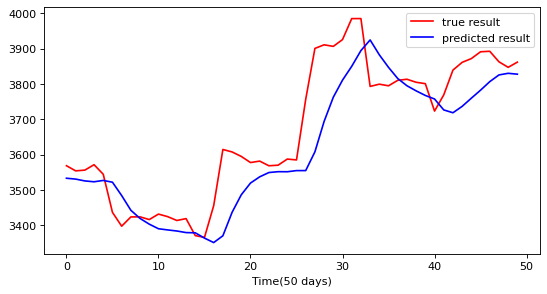

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r", label="true result")
plt.plot(predicted_data,color="b", label="predicted result")
plt.legend()
plt.xlabel("Time(50 days)")